## Importing

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Reading Data

In [25]:
dataset = pd.read_csv('D:/IBM Machine Learning/FuelConsumptionCo2.csv')
dataset.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [26]:
dataset.shape

(1067, 13)

## Ploting ' ENGINESIZE'  against the ' CO2EMISSIONS '

<function matplotlib.pyplot.show(close=None, block=None)>

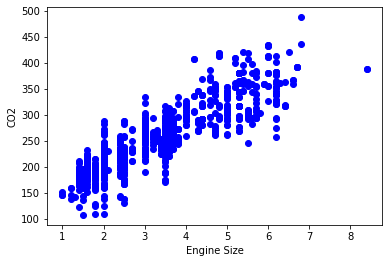

In [27]:
plt.scatter(dataset.ENGINESIZE, dataset.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2")
plt.show

## Creating Train and Test datasets

In [28]:
mask = np.random.rand(len(dataset)) < 0.8
train = dataset[mask]
test = dataset[~mask]

x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

## Modeling

In [29]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

print("Coefficient = ",linear_model.coef_)
print("Intercept = ",linear_model.intercept_)

Coefficient =  [[38.49148417]]
Intercept =  [126.63318141]


## Evaluation

In [30]:
predictions = linear_model.predict(x_test)

R2 = r2_score(y_test,predictions)
MAE = np.mean(np.absolute(y_test - predictions))
MSE = np.mean((y_test - predictions)**2)
print(f"R2 = {R2}\nMAE = {MAE}\nMSE = {MSE}")

R2 = 0.7673013035877034
MAE = 25.67832730405873
MSE = 1193.687742701012
